In [1]:
#Performing Canonical Correlation Analysis on Porcine Data
import pandas as pd

In [5]:
Nov = pd.read_csv("/content/28thNov_Porcine_CSV.csv")

In [6]:
Nov.head(19)

,LYMPH,MONO,TNF_Alpha,IL1_Beta,INF_Alpha,Average_IL6,Average_IL8,Average_NEUT,Average_BloodLoss,clot,Survived
0,-1.955714,-0.135714,0.000000,-0.100189,0.132167,-0.340635,-0.003481,0.662857,0.043956,0,1
1,-2.448571,-0.410000,0.000000,-0.044113,0.044704,0.159651,-0.069613,0.684286,0.249084,0,1
2,-1.020000,-0.412857,0.000000,-0.054240,-0.025267,0.030082,0.083793,0.892857,-0.205128,0,1
3,-1.225714,-0.261429,0.000000,-0.067404,0.134111,0.097029,0.070515,0.730000,0.058608,0,1
4,-0.861429,0.294286,0.172877,0.000949,0.244898,0.301607,0.583074,0.858571,0.052308,0,1
5,-2.397143,-0.340000,0.000000,0.048734,0.242954,0.199761,0.030681,1.344286,-0.029304,0,1
6,-2.857143,-0.545714,0.443146,-0.277714,0.398671,-0.027299,-0.143311,0.564286,0.000000,0,1
7,0.071429,0.288571,0.000000,0.042162,0.097176,-0.191094,0.153251,0.998571,0.014652,0,1
8,-1.192857,-0.104286,0.000000,-0.420553,-0.117110,0.461367,-0.172423,0.861429,0.029304,1,1
9,-11.934286,-1.742857,-1.252814,-1.790007,-1.709302,-0.159929,-1.482574,-0.747143,0.000000,0,0


In [7]:
from sklearn.cross_decomposition import CCA


# Split the data in X and Y
X = Nov[['LYMPH','MONO','TNF_Alpha','IL1_Beta','INF_Alpha','Average_IL6', 'Average_IL8', 'Average_NEUT', 'Average_BloodLoss']]
Y = Nov[['clot', 'Survived']]

# Instantiate the Canonical Correlation Analysis with 2 components
my_cca = CCA(n_components=2)

# Fit the model
my_cca.fit(X, Y)

CCA()

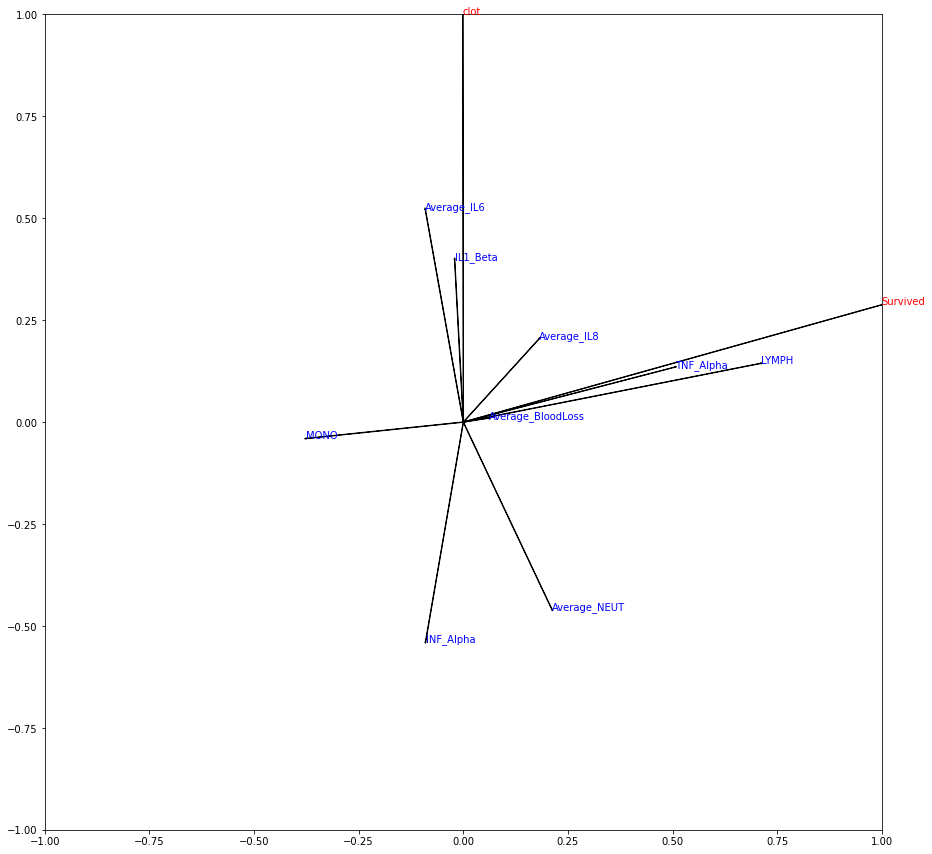

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Obtain the rotation matrices
xrot = my_cca.x_rotations_
yrot = my_cca.y_rotations_

# Put them together in a numpy matrix
xyrot = np.vstack((xrot,yrot))

nvariables = xyrot.shape[0]

plt.figure(figsize=(15, 15))
plt.xlim((-1,1))
plt.ylim((-1,1))

# Plot an arrow and a text label for each variable
for var_i in range(nvariables):
  x = xyrot[var_i,0]
  y = xyrot[var_i,1]

  plt.arrow(0,0,x,y)
  plt.text(x,y,Nov.columns[var_i], color='red' if var_i > 8 else 'blue')

plt.show()